[source of data](https://www.kaggle.com/datasets/supremeleaf/mlb-hitting-leaders-2019-2022)


# Goals for notebook


We have data from the past 4 complete seasons of MLB baseball that show the top offensive player's and their respective numbers. We want to analyze how these numbers relate to each other and how they impact the total number of Home Runs and Runs Batted In.

---

1. **Load the data** into a pandas DataFrame

--- 

2. **Clean data** (if necessary)
    - See if there are any missing values

---

3. **Exploratory Data Analysis** (EDA)
    - Make histograms of OPS, AVG
    - See which teams had the most RBI's and HomeRuns

---
4. **Feature Engineering**
    - Make new columns describing any intersting additional statistics (for example show each player's walks to strikeout ratio)
 
---
5. **Get the data ready for a machine learning model**
    - We want to see if we can build a model to predict Home Runs and or RBI's based on other features. 
 
---

6. **Evaluate our model's metrics** and see if we can improve it.

## Load Data

In [1]:
import os

os.listdir()

['.git',
 '.ipynb_checkpoints',
 '2019-2022 MLB Hitting Leaders CSV (UTF-8).csv',
 'catboost_info',
 'MLB Hitting Leaders 2019-2022.ipynb']

In [2]:
import pandas as pd 

df = pd.read_csv(os.listdir()[2])

df.head()

,Year,Player Name,Player Position,Team Name,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,AVG,OBP,SLG,OPS
0,2022,Aaron Judge,CF,NYY,157,570,133,177,28,0,62,131,111,175,16,3,0.311,0.425,0.686,1.111
1,2022,Yordan Alvarez,DH,HOU,135,470,95,144,29,2,37,97,78,106,1,1,0.306,0.406,0.613,1.019
2,2022,Paul Goldschmidt,1B,STL,151,561,106,178,41,0,35,115,79,141,7,0,0.317,0.404,0.578,0.982
3,2022,Jose Altuve,2B,HOU,141,527,103,158,39,0,28,57,66,87,18,1,0.300,0.387,0.533,0.920
4,2022,Freddie Freeman,1B,LAD,159,612,117,199,47,2,21,100,84,102,13,3,0.325,0.407,0.511,0.918


## Descriptive Statistics and Data Visualisation

In [3]:
desc_stats = df.describe()

desc_stats

,Year,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,AVG,OBP,SLG,OPS
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000
mean,2020.476809,121.129870,445.103896,66.933210,118.192950,23.812616,1.964750,19.302412,64.020408,45.777365,101.961039,7.231911,2.293135,0.264171,0.338481,0.456505,0.794985
std,1.111331,40.704413,154.741769,26.713946,44.520534,10.430873,1.964523,11.058118,27.534661,22.935552,42.920870,8.198968,2.386332,0.030388,0.033779,0.070663,0.095562
min,2019.000000,44.000000,154.000000,13.000000,32.000000,3.000000,0.000000,0.000000,10.000000,5.000000,12.000000,0.000000,0.000000,0.176000,0.238000,0.266000,0.552000
25%,2019.500000,60.000000,232.500000,42.500000,68.000000,15.000000,0.000000,11.000000,41.000000,28.000000,64.000000,1.000000,0.000000,0.245000,0.316000,0.409000,0.731000
50%,2020.000000,140.000000,499.000000,71.000000,130.000000,25.000000,2.000000,17.000000,65.000000,45.000000,103.000000,4.000000,2.000000,0.265000,0.338000,0.450000,0.788000
75%,2021.000000,150.500000,555.500000,86.500000,150.000000,31.000000,3.000000,28.000000,85.000000,59.000000,134.000000,10.000000,3.000000,0.283000,0.358000,0.503000,0.850000
max,2022.000000,162.000000,681.000000,135.000000,206.000000,58.000000,10.000000,62.000000,131.000000,145.000000,213.000000,47.000000,12.000000,0.364000,0.490000,0.695000,1.185000


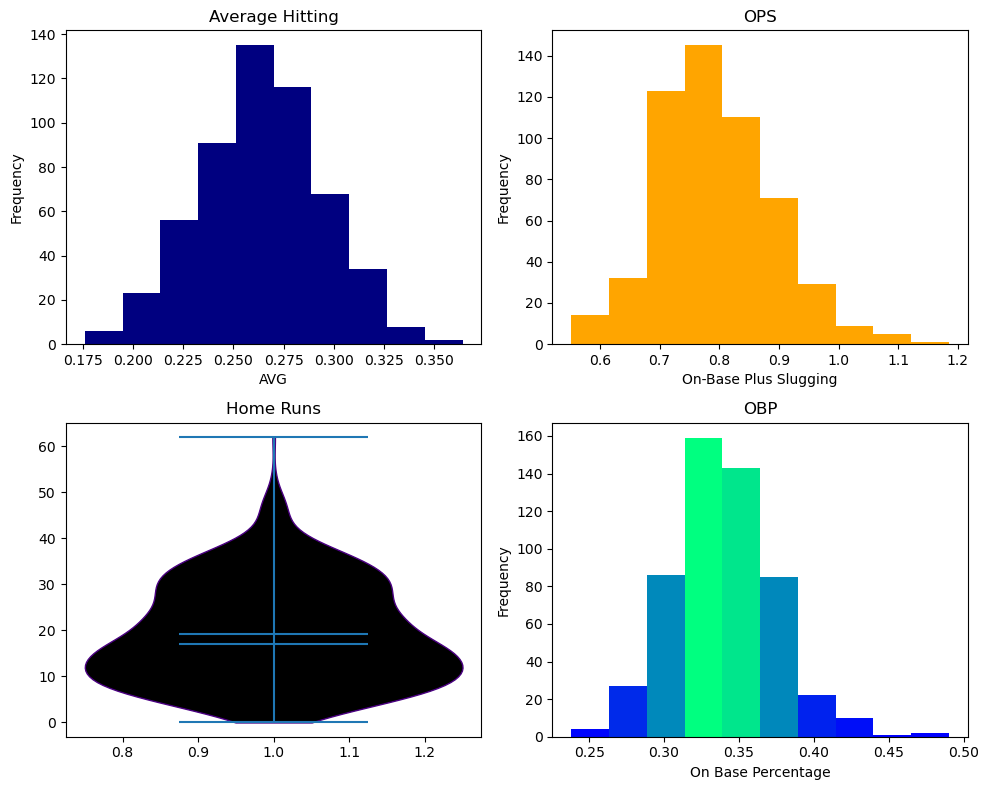

In [4]:
import matplotlib.pyplot as plt 
from matplotlib import colors

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 8), tight_layout=True)

ax1.hist(df['AVG'], color='navy')
ax1.set_ylabel('Frequency')
ax1.set_xlabel('AVG')
ax1.set_title('Average Hitting')

ax2.hist(df['OPS'], color='orange')
ax2.set_xlabel('On-Base Plus Slugging')
ax2.set_ylabel('Frequency')
ax2.set_title('OPS')

violin = ax3.violinplot(df['HR'], showmeans=True, showmedians=True)

for ii in violin['bodies']:
    ii.set_color('black')
    ii.set_edgecolor('indigo')
    ii.set_alpha(1)
    
ax3.set_title('Home Runs')

N, bins, patches = ax4.hist(df['OBP'])
fracs = N / N.max()
norm = colors.Normalize(fracs.min(), fracs.max())

for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.winter(norm(thisfrac))
    thispatch.set_facecolor(color)
    
ax4.set_xlabel('On Base Percentage')
ax4.set_ylabel('Frequency')
ax4.set_title('OBP')

plt.show()

See how player position factors into runs and RBI's.

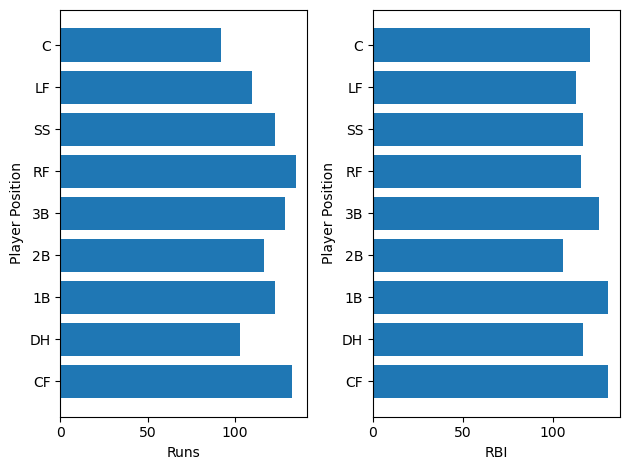

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, tight_layout=True)

ax1.barh(df['Player Position'], df['R'])
ax1.set_xlabel('Runs')
ax1.set_ylabel('Player Position')

ax2.barh(df['Player Position'], df['RBI'])
ax2.set_xlabel('RBI')
ax2.set_ylabel('Player Position')

plt.show()

## Feature Engineering

Let's manipulate the data to see if we can extract any more interesting features.  

In [6]:
df.head(10)

,Year,Player Name,Player Position,Team Name,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,AVG,OBP,SLG,OPS
0,2022,Aaron Judge,CF,NYY,157,570,133,177,28,0,62,131,111,175,16,3,0.311,0.425,0.686,1.111
1,2022,Yordan Alvarez,DH,HOU,135,470,95,144,29,2,37,97,78,106,1,1,0.306,0.406,0.613,1.019
2,2022,Paul Goldschmidt,1B,STL,151,561,106,178,41,0,35,115,79,141,7,0,0.317,0.404,0.578,0.982
3,2022,Jose Altuve,2B,HOU,141,527,103,158,39,0,28,57,66,87,18,1,0.300,0.387,0.533,0.920
4,2022,Freddie Freeman,1B,LAD,159,612,117,199,47,2,21,100,84,102,13,3,0.325,0.407,0.511,0.918
5,2022,Manny Machado,3B,SD,150,578,100,172,37,1,32,102,63,133,9,1,0.298,0.366,0.531,0.897
6,2022,Nolan Arenado,3B,STL,148,557,73,163,42,1,30,103,52,72,5,3,0.293,0.358,0.533,0.891
7,2022,Rafael Devers,3B,BOS,141,555,84,164,42,1,27,88,50,114,3,1,0.295,0.358,0.521,0.879
8,2022,Austin Riley,3B,ATL,159,615,90,168,39,2,38,93,57,168,2,0,0.273,0.349,0.528,0.877
9,2022,Shohei Ohtani,DH,LAA,157,586,90,160,30,6,34,95,72,161,11,9,0.273,0.356,0.519,0.875


In [7]:
run_to_hit_ratio = df.R / df.H

run_to_hit_ratio

0      0.751412
1      0.659722
2      0.595506
3      0.651899
4      0.587940
         ...   
534    0.575472
535    0.508772
536    0.472000
537    0.603448
538    0.463636
Length: 539, dtype: float64

Create a run-to-hit ratio

In [8]:
df['run_to_hit_ratio'] = df['R'] / df['H']

df.head()

,Year,Player Name,Player Position,Team Name,G,AB,R,H,2B,3B,...,RBI,BB,SO,SB,CS,AVG,OBP,SLG,OPS,run_to_hit_ratio
0,2022,Aaron Judge,CF,NYY,157,570,133,177,28,0,...,131,111,175,16,3,0.311,0.425,0.686,1.111,0.751412
1,2022,Yordan Alvarez,DH,HOU,135,470,95,144,29,2,...,97,78,106,1,1,0.306,0.406,0.613,1.019,0.659722
2,2022,Paul Goldschmidt,1B,STL,151,561,106,178,41,0,...,115,79,141,7,0,0.317,0.404,0.578,0.982,0.595506
3,2022,Jose Altuve,2B,HOU,141,527,103,158,39,0,...,57,66,87,18,1,0.300,0.387,0.533,0.920,0.651899
4,2022,Freddie Freeman,1B,LAD,159,612,117,199,47,2,...,100,84,102,13,3,0.325,0.407,0.511,0.918,0.587940


In [9]:
strikeout_rate = df['SO'] / df['AB']

strikeout_rate

0      0.307018
1      0.225532
2      0.251337
3      0.165085
4      0.166667
         ...   
534    0.303534
535    0.234000
536    0.235887
537    0.276471
538    0.220648
Length: 539, dtype: float64

Create a strikeout rate

In [10]:
df['strikeout_rate'] = df['SO'] / df['AB']

df.head()

,Year,Player Name,Player Position,Team Name,G,AB,R,H,2B,3B,...,BB,SO,SB,CS,AVG,OBP,SLG,OPS,run_to_hit_ratio,strikeout_rate
0,2022,Aaron Judge,CF,NYY,157,570,133,177,28,0,...,111,175,16,3,0.311,0.425,0.686,1.111,0.751412,0.307018
1,2022,Yordan Alvarez,DH,HOU,135,470,95,144,29,2,...,78,106,1,1,0.306,0.406,0.613,1.019,0.659722,0.225532
2,2022,Paul Goldschmidt,1B,STL,151,561,106,178,41,0,...,79,141,7,0,0.317,0.404,0.578,0.982,0.595506,0.251337
3,2022,Jose Altuve,2B,HOU,141,527,103,158,39,0,...,66,87,18,1,0.300,0.387,0.533,0.920,0.651899,0.165085
4,2022,Freddie Freeman,1B,LAD,159,612,117,199,47,2,...,84,102,13,3,0.325,0.407,0.511,0.918,0.587940,0.166667


In [11]:
df['AVG'] * df['OBP'] * df['SLG'] * df['OPS']

0      0.100737
1      0.077604
2      0.072691
3      0.056931
4      0.062050
         ...   
534    0.016963
535    0.015866
536    0.016437
537    0.014487
538    0.013982
Length: 539, dtype: float64

Multiply all the percentages to get an overall offensive score.

In [12]:
df['AVG * OBP * SLG * OPS'] = df['AVG'] * df['OBP'] * df['SLG'] * df['OPS']

df.head()

,Year,Player Name,Player Position,Team Name,G,AB,R,H,2B,3B,...,SO,SB,CS,AVG,OBP,SLG,OPS,run_to_hit_ratio,strikeout_rate,AVG * OBP * SLG * OPS
0,2022,Aaron Judge,CF,NYY,157,570,133,177,28,0,...,175,16,3,0.311,0.425,0.686,1.111,0.751412,0.307018,0.100737
1,2022,Yordan Alvarez,DH,HOU,135,470,95,144,29,2,...,106,1,1,0.306,0.406,0.613,1.019,0.659722,0.225532,0.077604
2,2022,Paul Goldschmidt,1B,STL,151,561,106,178,41,0,...,141,7,0,0.317,0.404,0.578,0.982,0.595506,0.251337,0.072691
3,2022,Jose Altuve,2B,HOU,141,527,103,158,39,0,...,87,18,1,0.300,0.387,0.533,0.920,0.651899,0.165085,0.056931
4,2022,Freddie Freeman,1B,LAD,159,612,117,199,47,2,...,102,13,3,0.325,0.407,0.511,0.918,0.587940,0.166667,0.062050


## Build a machine learning model

Let's get our data ready for a machine learning model by:

- Transforming any categorical variables into numeric ones
- Deal with any missing values (if there are any)

### Are there any missing values? 

In [13]:
df.isna().sum()

Year                     0
Player Name              0
Player Position          0
Team Name                0
G                        0
AB                       0
R                        0
H                        0
2B                       0
3B                       0
HR                       0
RBI                      0
BB                       0
SO                       0
SB                       0
CS                       0
AVG                      0
OBP                      0
SLG                      0
OPS                      0
run_to_hit_ratio         0
strikeout_rate           0
AVG * OBP * SLG * OPS    0
dtype: int64

There are no missing values, so we don't have to do anything more.

### Turning strings into numeric values

In [14]:
df.dtypes

Year                       int64
Player Name               object
Player Position           object
Team Name                 object
G                          int64
AB                         int64
R                          int64
H                          int64
2B                         int64
3B                         int64
HR                         int64
RBI                        int64
BB                         int64
SO                         int64
SB                         int64
CS                         int64
AVG                      float64
OBP                      float64
SLG                      float64
OPS                      float64
run_to_hit_ratio         float64
strikeout_rate           float64
AVG * OBP * SLG * OPS    float64
dtype: object

We can see that 3 columns are of object data type, which is no good for a machine learning model. The model needs to have numeric data, so we'll have to change the dtype of these features. We can do this with pandas `api`.

In [15]:
pd.api.types.is_object_dtype(df['Player Name'])

True

In [16]:
# Create a copy of dataframe so we have the original
df_temp = df.copy()

df_temp.head()

,Year,Player Name,Player Position,Team Name,G,AB,R,H,2B,3B,...,SO,SB,CS,AVG,OBP,SLG,OPS,run_to_hit_ratio,strikeout_rate,AVG * OBP * SLG * OPS
0,2022,Aaron Judge,CF,NYY,157,570,133,177,28,0,...,175,16,3,0.311,0.425,0.686,1.111,0.751412,0.307018,0.100737
1,2022,Yordan Alvarez,DH,HOU,135,470,95,144,29,2,...,106,1,1,0.306,0.406,0.613,1.019,0.659722,0.225532,0.077604
2,2022,Paul Goldschmidt,1B,STL,151,561,106,178,41,0,...,141,7,0,0.317,0.404,0.578,0.982,0.595506,0.251337,0.072691
3,2022,Jose Altuve,2B,HOU,141,527,103,158,39,0,...,87,18,1,0.300,0.387,0.533,0.920,0.651899,0.165085,0.056931
4,2022,Freddie Freeman,1B,LAD,159,612,117,199,47,2,...,102,13,3,0.325,0.407,0.511,0.918,0.587940,0.166667,0.062050


In [17]:
for column_name, column in df_temp.items():
    print(column_name)

Year
Player Name
Player Position
Team Name
G
AB
R
H
2B
3B
HR
RBI
BB
SO
SB
CS
AVG
OBP
SLG
OPS
run_to_hit_ratio
strikeout_rate
AVG * OBP * SLG * OPS


In [18]:
pd.Categorical(df['Player Name']).codes

array([  2, 257, 199, 124,  83, 165, 193, 202,  27, 221, 184, 201, 126,
       134, 133, 186,  16, 109, 250,  42, 225, 151, 127, 252,  12,  98,
       242,  22, 223,  85,  33, 233, 245, 150, 226,  92,  39,  50,  29,
       171,  35, 157, 208,  77,  96,  81, 136,  11, 128,  41,  93,  60,
       237, 224,  23, 206,  17,  56, 168, 213,  87, 211,  88, 218, 170,
       247,   8,  20, 219,  61, 215, 132,  51, 192,  57,  47,  36, 167,
        14, 139, 216,  71, 229, 205, 197, 158, 100, 227, 135,  30,  45,
        25, 111,  15,  10, 173, 248, 236, 161,  89,  73, 162, 152, 146,
        19, 182, 189,  43, 112, 166, 231, 129,   0,  97, 243, 105, 113,
       137,  52, 187, 258, 120, 232,  94,  46, 234,   6, 178, 185, 118,
        40, 242, 133,  80, 221, 189, 116,   2, 150, 238,  39, 171, 233,
        41,  27,  83,  32, 173, 126, 202, 199,  45, 257, 167, 226,  86,
        96, 201, 250,  34, 217, 184,  42, 101, 259, 223, 124, 165, 117,
       145, 123, 136, 187,  29, 129, 121, 128,  28, 247,  92, 20

In [19]:
def transform_dataframe(df):
    """
    Takes a dataframe and transforms any categorical (text) columns into a numeric datatype.
    
    """
    # Find all the numeric columns
    for column_name, column in df_temp.items():
        if pd.api.types.is_numeric_dtype(column):
            print(f'{column_name} is numeric')
    
    # If column is non-numeric change the dtype to a pandas Category
    for column_name, column in df_temp.items():
        if not pd.api.types.is_numeric_dtype(column):
            print(f'{column_name} is not numeric')
            df[column_name] = pd.Categorical(column).codes+1
            

transform_dataframe(df=df_temp)

print(df_temp.info())

Year is numeric
G is numeric
AB is numeric
R is numeric
H is numeric
2B is numeric
3B is numeric
HR is numeric
RBI is numeric
BB is numeric
SO is numeric
SB is numeric
CS is numeric
AVG is numeric
OBP is numeric
SLG is numeric
OPS is numeric
run_to_hit_ratio is numeric
strikeout_rate is numeric
AVG * OBP * SLG * OPS is numeric
Player Name is not numeric
Player Position is not numeric
Team Name is not numeric
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   539 non-null    int64  
 1   Player Name            539 non-null    int16  
 2   Player Position        539 non-null    int8   
 3   Team Name              539 non-null    int8   
 4   G                      539 non-null    int64  
 5   AB                     539 non-null    int64  
 6   R                      539 non-null    int64  
 7   H         

Change the datatypes to all be the same (int64) 

In [20]:
df_temp

,Year,Player Name,Player Position,Team Name,G,AB,R,H,2B,3B,...,SO,SB,CS,AVG,OBP,SLG,OPS,run_to_hit_ratio,strikeout_rate,AVG * OBP * SLG * OPS
0,2022,3,5,19,157,570,133,177,28,0,...,175,16,3,0.311,0.425,0.686,1.111,0.751412,0.307018,0.100737
1,2022,258,6,11,135,470,95,144,29,2,...,106,1,1,0.306,0.406,0.613,1.019,0.659722,0.225532,0.077604
2,2022,200,1,26,151,561,106,178,41,0,...,141,7,0,0.317,0.404,0.578,0.982,0.595506,0.251337,0.072691
3,2022,125,2,11,141,527,103,158,39,0,...,87,18,1,0.300,0.387,0.533,0.920,0.651899,0.165085,0.056931
4,2022,84,1,14,159,612,117,199,47,2,...,102,13,3,0.325,0.407,0.511,0.918,0.587940,0.166667,0.062050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,2019,143,6,20,133,481,61,106,11,0,...,146,0,0,0.220,0.293,0.387,0.680,0.575472,0.303534,0.016963
535,2019,33,9,25,147,500,58,114,24,2,...,117,3,2,0.228,0.304,0.350,0.654,0.508772,0.234000,0.015866
536,2019,257,2,9,149,496,59,125,20,4,...,117,5,4,0.252,0.318,0.321,0.639,0.472000,0.235887,0.016437
537,2019,165,5,24,134,510,70,116,19,9,...,141,46,9,0.227,0.300,0.335,0.635,0.603448,0.276471,0.014487


In [21]:
import numpy as np 

np.array(df.columns)

array(['Year', 'Player Name', 'Player Position', 'Team Name', 'G', 'AB',
       'R', 'H', '2B', '3B', 'HR', 'RBI', 'BB', 'SO', 'SB', 'CS', 'AVG',
       'OBP', 'SLG', 'OPS', 'run_to_hit_ratio', 'strikeout_rate',
       'AVG * OBP * SLG * OPS'], dtype=object)

In [22]:
from numpy import float64

for ii in np.array(df_temp.columns):
    df_temp[ii] = df_temp[ii].astype(float64)
    
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   539 non-null    float64
 1   Player Name            539 non-null    float64
 2   Player Position        539 non-null    float64
 3   Team Name              539 non-null    float64
 4   G                      539 non-null    float64
 5   AB                     539 non-null    float64
 6   R                      539 non-null    float64
 7   H                      539 non-null    float64
 8   2B                     539 non-null    float64
 9   3B                     539 non-null    float64
 10  HR                     539 non-null    float64
 11  RBI                    539 non-null    float64
 12  BB                     539 non-null    float64
 13  SO                     539 non-null    float64
 14  SB                     539 non-null    float64
 15  CS    

In [23]:
df_temp.head()

,Year,Player Name,Player Position,Team Name,G,AB,R,H,2B,3B,...,SO,SB,CS,AVG,OBP,SLG,OPS,run_to_hit_ratio,strikeout_rate,AVG * OBP * SLG * OPS
0,2022.0,3.0,5.0,19.0,157.0,570.0,133.0,177.0,28.0,0.0,...,175.0,16.0,3.0,0.311,0.425,0.686,1.111,0.751412,0.307018,0.100737
1,2022.0,258.0,6.0,11.0,135.0,470.0,95.0,144.0,29.0,2.0,...,106.0,1.0,1.0,0.306,0.406,0.613,1.019,0.659722,0.225532,0.077604
2,2022.0,200.0,1.0,26.0,151.0,561.0,106.0,178.0,41.0,0.0,...,141.0,7.0,0.0,0.317,0.404,0.578,0.982,0.595506,0.251337,0.072691
3,2022.0,125.0,2.0,11.0,141.0,527.0,103.0,158.0,39.0,0.0,...,87.0,18.0,1.0,0.300,0.387,0.533,0.920,0.651899,0.165085,0.056931
4,2022.0,84.0,1.0,14.0,159.0,612.0,117.0,199.0,47.0,2.0,...,102.0,13.0,3.0,0.325,0.407,0.511,0.918,0.587940,0.166667,0.062050


Now that there are no string values, and all the values are in the same format it's ready for a machine learning model.

## Make a correlation matrix

before we go on to build a machine learning model, let's create a correlation matrix to see how important each feature is to the other.

In [24]:
df_temp.corr()

,Year,Player Name,Player Position,Team Name,G,AB,R,H,2B,3B,...,SO,SB,CS,AVG,OBP,SLG,OPS,run_to_hit_ratio,strikeout_rate,AVG * OBP * SLG * OPS
Year,1.000000,0.011271,-0.022183,0.043397,0.251084,0.232970,0.094049,0.160317,0.147542,-0.042518,...,0.183344,0.090246,0.020090,-0.143152,-0.150891,-0.232494,-0.225255,-0.121642,-0.032655,-0.207495
Player Name,0.011271,1.000000,-0.061590,0.059681,0.013051,0.018378,0.036012,0.021332,0.054084,-0.058756,...,0.050498,0.101066,0.037907,0.013859,0.005708,0.026764,0.021808,0.046950,0.058901,0.015903
Player Position,-0.022183,-0.061590,1.000000,-0.019443,-0.024265,-0.015307,0.000271,-0.004093,-0.016369,0.091518,...,0.006809,0.191662,0.203741,0.067105,-0.047033,-0.000507,-0.017000,-0.006207,0.013081,0.002610
Team Name,0.043397,0.059681,-0.019443,1.000000,0.017687,-0.000350,-0.012757,-0.022000,-0.069432,0.003312,...,-0.002827,0.065612,0.058434,-0.049393,0.029718,-0.063695,-0.036594,0.001255,-0.005937,-0.024320
G,0.251084,0.013051,-0.024265,0.017687,1.000000,0.981775,0.848434,0.916206,0.812997,0.349979,...,0.763330,0.302863,0.297857,0.056775,-0.008681,0.020486,0.012080,-0.108687,-0.122967,-0.015365
AB,0.232970,0.018378,-0.015307,-0.000350,0.981775,1.000000,0.881143,0.957258,0.849755,0.380376,...,0.746846,0.339130,0.331552,0.129356,-0.001365,0.059338,0.043395,-0.122651,-0.163595,0.020967
R,0.094049,0.036012,0.000271,-0.012757,0.848434,0.881143,1.000000,0.900507,0.817653,0.371099,...,0.683647,0.378443,0.316840,0.287845,0.296162,0.365676,0.375086,0.232089,-0.106239,0.329739
H,0.160317,0.021332,-0.004093,-0.022000,0.916206,0.957258,0.900507,1.000000,0.878485,0.397852,...,0.633079,0.357186,0.340996,0.387694,0.186084,0.207718,0.219374,-0.172037,-0.271870,0.223753
2B,0.147542,0.054084,-0.016369,-0.069432,0.812997,0.849755,0.817653,0.878485,1.000000,0.333025,...,0.570289,0.284767,0.284924,0.321214,0.170251,0.236138,0.234792,-0.105416,-0.229998,0.223483
3B,-0.042518,-0.058756,0.091518,0.003312,0.349979,0.380376,0.371099,0.397852,0.333025,1.000000,...,0.207374,0.425176,0.402661,0.156529,0.017538,0.040244,0.035957,-0.032369,-0.160572,0.044328


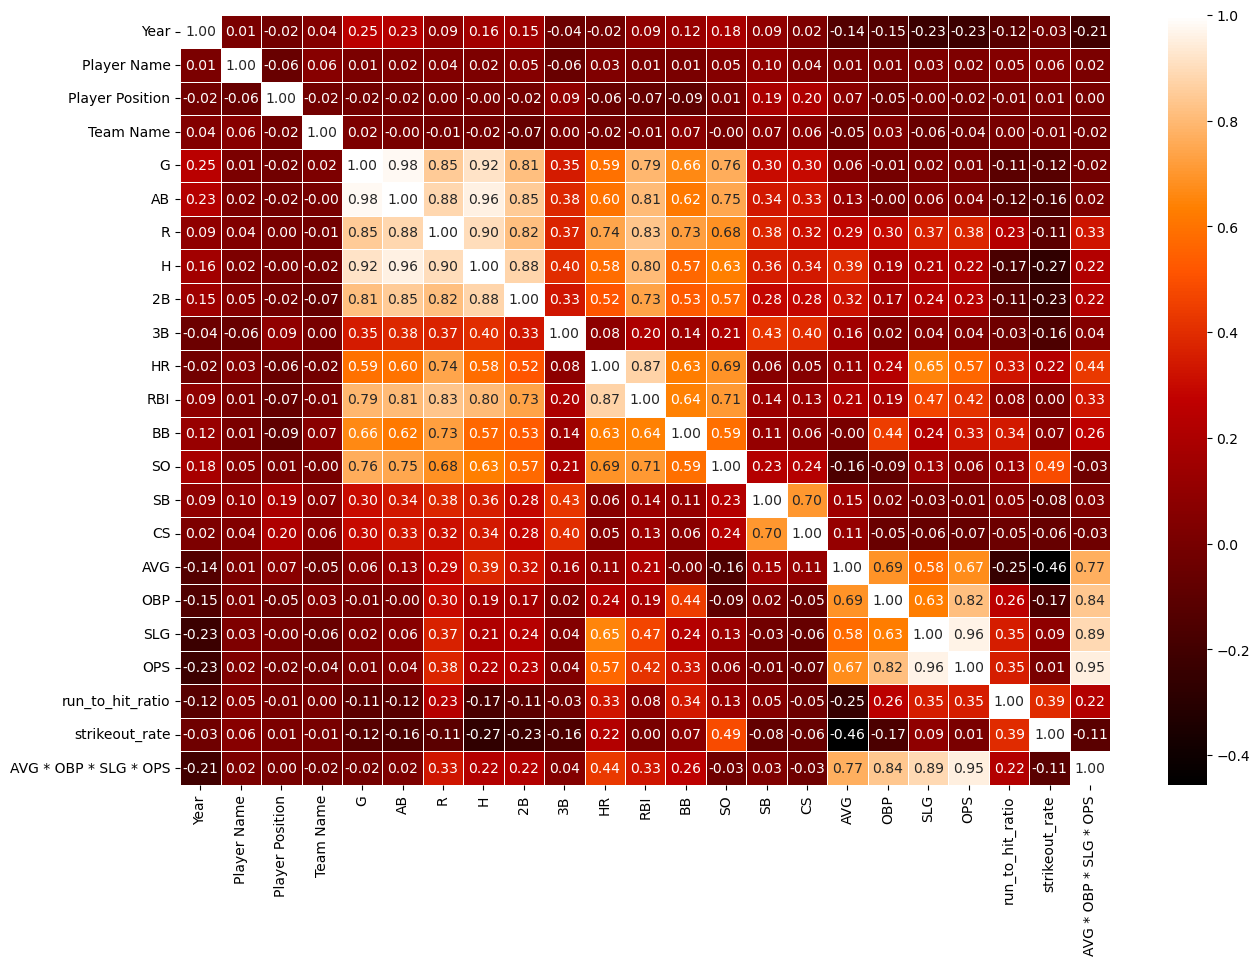

In [25]:
import seaborn as sns

corr_matrix = df_temp.corr()

fig, ax = plt.subplots(figsize=(15, 10))

ax = sns.heatmap(corr_matrix, fmt='.2f', cmap='gist_heat', annot=True, linewidths=0.5)

## Build a Machine Learning Model

Let's try building a model to predict how many home runs a player will get.

In [26]:
# Split data into x and y 
X = df_temp.drop('HR', axis=1)
y = df_temp['HR']

X

,Year,Player Name,Player Position,Team Name,G,AB,R,H,2B,3B,...,SO,SB,CS,AVG,OBP,SLG,OPS,run_to_hit_ratio,strikeout_rate,AVG * OBP * SLG * OPS
0,2022.0,3.0,5.0,19.0,157.0,570.0,133.0,177.0,28.0,0.0,...,175.0,16.0,3.0,0.311,0.425,0.686,1.111,0.751412,0.307018,0.100737
1,2022.0,258.0,6.0,11.0,135.0,470.0,95.0,144.0,29.0,2.0,...,106.0,1.0,1.0,0.306,0.406,0.613,1.019,0.659722,0.225532,0.077604
2,2022.0,200.0,1.0,26.0,151.0,561.0,106.0,178.0,41.0,0.0,...,141.0,7.0,0.0,0.317,0.404,0.578,0.982,0.595506,0.251337,0.072691
3,2022.0,125.0,2.0,11.0,141.0,527.0,103.0,158.0,39.0,0.0,...,87.0,18.0,1.0,0.300,0.387,0.533,0.920,0.651899,0.165085,0.056931
4,2022.0,84.0,1.0,14.0,159.0,612.0,117.0,199.0,47.0,2.0,...,102.0,13.0,3.0,0.325,0.407,0.511,0.918,0.587940,0.166667,0.062050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,2019.0,143.0,6.0,20.0,133.0,481.0,61.0,106.0,11.0,0.0,...,146.0,0.0,0.0,0.220,0.293,0.387,0.680,0.575472,0.303534,0.016963
535,2019.0,33.0,9.0,25.0,147.0,500.0,58.0,114.0,24.0,2.0,...,117.0,3.0,2.0,0.228,0.304,0.350,0.654,0.508772,0.234000,0.015866
536,2019.0,257.0,2.0,9.0,149.0,496.0,59.0,125.0,20.0,4.0,...,117.0,5.0,4.0,0.252,0.318,0.321,0.639,0.472000,0.235887,0.016437
537,2019.0,165.0,5.0,24.0,134.0,510.0,70.0,116.0,19.0,9.0,...,141.0,46.0,9.0,0.227,0.300,0.335,0.635,0.603448,0.276471,0.014487


In [27]:
y

0      62.0
1      37.0
2      35.0
3      28.0
4      21.0
       ... 
534    23.0
535    11.0
536     2.0
537     6.0
538    15.0
Name: HR, Length: 539, dtype: float64

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20,
                                                    random_state=666)

X_train

,Year,Player Name,Player Position,Team Name,G,AB,R,H,2B,3B,...,SO,SB,CS,AVG,OBP,SLG,OPS,run_to_hit_ratio,strikeout_rate,AVG * OBP * SLG * OPS
284,2020.0,22.0,3.0,13.0,52.0,189.0,29.0,54.0,11.0,1.0,...,31.0,0.0,0.0,0.286,0.418,0.497,0.915,0.537037,0.164021,0.054365
187,2021.0,101.0,2.0,23.0,152.0,567.0,94.0,151.0,33.0,7.0,...,90.0,4.0,3.0,0.266,0.340,0.460,0.800,0.622517,0.158730,0.033282
460,2019.0,224.0,5.0,22.0,132.0,539.0,97.0,159.0,31.0,6.0,...,94.0,25.0,6.0,0.295,0.342,0.503,0.845,0.610063,0.174397,0.042882
11,2022.0,202.0,1.0,18.0,160.0,597.0,95.0,162.0,27.0,0.0,...,128.0,5.0,1.0,0.271,0.352,0.518,0.870,0.586420,0.214405,0.042989
232,2021.0,76.0,1.0,23.0,151.0,509.0,53.0,137.0,28.0,0.0,...,99.0,5.0,4.0,0.269,0.337,0.395,0.732,0.386861,0.194499,0.026211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,2019.0,89.0,9.0,19.0,144.0,546.0,96.0,152.0,26.0,0.0,...,129.0,5.0,2.0,0.278,0.337,0.535,0.872,0.631579,0.236264,0.043706
414,2019.0,202.0,1.0,18.0,161.0,597.0,103.0,155.0,30.0,2.0,...,183.0,1.0,0.0,0.260,0.358,0.583,0.941,0.664516,0.306533,0.051064
70,2022.0,216.0,3.0,8.0,153.0,529.0,67.0,130.0,23.0,3.0,...,158.0,7.0,3.0,0.246,0.327,0.414,0.741,0.515385,0.298677,0.024678
429,2019.0,44.0,1.0,7.0,158.0,573.0,110.0,161.0,30.0,1.0,...,108.0,4.0,0.0,0.281,0.397,0.515,0.912,0.683230,0.188482,0.052396


In [29]:
y_train

284     9.0
187    21.0
460    23.0
11     40.0
232    12.0
       ... 
445    38.0
414    53.0
70     20.0
429    34.0
236     8.0
Name: HR, Length: 431, dtype: float64

In [30]:
X_train.shape, y_train.shape

((431, 22), (431,))

In [31]:
X_test.shape, y_test.shape

((108, 22), (108,))

In [32]:
# !pip install catboost

In [33]:
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
from catboost import CatBoostRegressor

np.random.seed(666)

models = {'AdaBoost': AdaBoostRegressor(),
          'KNN': KNeighborsRegressor(),
          'Support Vector Machine': LinearSVR(),
          'ExtraTrees': ExtraTreesRegressor(),
          'Random Forest': RandomForestRegressor(),
          'GradientBoosting': GradientBoostingRegressor(),
          'CatBoost': CatBoostRegressor(verbose=0)}


def train_models(models: dict, X_train, X_test, y_train, y_test):
    
    model_train_scores = {}
    model_test_scores = {}
    
    for model_name, model in models.items():
        print(f'Fitting model {model_name}')
        model.fit(X_train, y_train)
        
        model_train_scores[model_name] = model.score(X_train, y_train)
        model_test_scores[model_name] = model.score(X_test, y_test)
        
    return model_train_scores, model_test_scores


train_models(models, X_train, X_test, y_train, y_test)

Fitting model AdaBoost
Fitting model KNN
Fitting model Support Vector Machine


C:\Users\Jordan\anaconda3-2023\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Fitting model ExtraTrees
Fitting model Random Forest
Fitting model GradientBoosting
Fitting model CatBoost


({'AdaBoost': 0.9286631713397986,
  'KNN': 0.8037141965782321,
  'Support Vector Machine': 0.8724454407508145,
  'ExtraTrees': 1.0,
  'Random Forest': 0.9881160143302705,
  'GradientBoosting': 0.9902382319119076,
  'CatBoost': 0.9997550603425505},
 {'AdaBoost': 0.8599337431816676,
  'KNN': 0.7002678885753402,
  'Support Vector Machine': 0.8933242774809239,
  'ExtraTrees': 0.9169202022854908,
  'Random Forest': 0.9060005342125115,
  'GradientBoosting': 0.9365180308137456,
  'CatBoost': 0.9284641736813508})

From our first test we can see that the Gradient Boosting model performs the best on the test set with it's default parameters, so we'll continue with this model.

In [34]:
grad_boost_model = GradientBoostingRegressor()

grad_boost_model.fit(X_train, y_train)
grad_boost_model.score(X_test, y_test)

0.9381367386200072

In [35]:
.307 * .410 *.661* 1.071

0.08910727496999998

In [36]:
shohei_ohtani = np.array([2023.0, 1.0, 6.0, 15.0, 132.0, 489.0, 101.0, 150.0, 25.0, 8.0, 95.0, 85.0, 141.0, 19.0 ,6.0, 0.307, 0.410, 0.661, 1.071, 0.6733333333333333, 0.2883435582822086, 0.08910727496999998
])

shohei_ohtani.reshape(1, -1)

array([[2.02300000e+03, 1.00000000e+00, 6.00000000e+00, 1.50000000e+01,
        1.32000000e+02, 4.89000000e+02, 1.01000000e+02, 1.50000000e+02,
        2.50000000e+01, 8.00000000e+00, 9.50000000e+01, 8.50000000e+01,
        1.41000000e+02, 1.90000000e+01, 6.00000000e+00, 3.07000000e-01,
        4.10000000e-01, 6.61000000e-01, 1.07100000e+00, 6.73333333e-01,
        2.88343558e-01, 8.91072750e-02]])

In [37]:
len(shohei_ohtani)

22

In [38]:
grad_boost_model.predict(shohei_ohtani.reshape(1, -1))

C:\Users\Jordan\anaconda3-2023\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([39.58962458])

As of the writing of this notebook Shohei Ohtani has 44 homeruns, so rounding up our base model is predicting he should have around 40 homeruns, which is not too shabby for a model with default parameters. Let's evaluate our model's metrics and see if we can improve our model by tuning it's hyperparameters.

## Evaluate model's metrics

The default metric score that regression model's use is **R2** (Coefficient of Determination). The list of metrics we can use to evaluate models can be found [here](https://scikit-learn.org/stable/modules/model_evaluation.html).  

In [41]:
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error, mean_absolute_error

def model_metrics(model):
    
    model_preds = model.predict(X_test)
    true_preds = y_test
    
    scores = {'R2': r2_score(y_true=true_preds,
                             y_pred=model_preds),
              'Mean Squared Error': mean_squared_error(y_true=y_test,
                                                       y_pred=model_preds),
              'Mean Absolute Error': mean_absolute_error(y_true=y_test,
                                                         y_pred=model_preds),
              'Mean Squared Log Error': mean_squared_log_error(y_true=y_test,
                                                               y_pred=model_preds)}
    
    return scores

model_metrics(model=grad_boost_model)

{'R2': 0.9381367386200072,
 'Mean Squared Error': 8.542237608222694,
 'Mean Absolute Error': 2.179228172737481,
 'Mean Squared Log Error': 0.08361053007826937}

Let's go through all of our models and see which has the best overall metrics. 

In [48]:
models = {'Random Forest': RandomForestRegressor(),
          'Gradient Boosting': GradientBoostingRegressor(),
          'catboost': CatBoostRegressor(verbose=0)}

for model_name, model in models.items():
    print(f'Fitting {model_name}')
    model.fit(X_train, y_train)
    print(f'Scoring {model_name}')
    print(model_metrics(model=model))

Fitting Random Forest
Scoring Random Forest
{'R2': 0.9100736945042049, 'Mean Squared Error': 12.417254629629626, 'Mean Absolute Error': 2.5387962962962956, 'Mean Squared Log Error': 0.11507279609462101}
Fitting Gradient Boosting
Scoring Gradient Boosting
{'R2': 0.937831934651002, 'Mean Squared Error': 8.584325721087914, 'Mean Absolute Error': 2.17413905571074, 'Mean Squared Log Error': 0.08356007553293097}
Fitting catboost
Scoring catboost
{'R2': 0.9284641736813508, 'Mean Squared Error': 9.877850153436622, 'Mean Absolute Error': 2.057505305063898, 'Mean Squared Log Error': 0.095040599925313}


As we can see our Gradient Boosting Model performs best in some of the main regression metrics, just for comparison let's see how the second best model CatBoost and third best model Random Forest does when predicting Shohei Ohtani. 

In [50]:
cat_boost_model = CatBoostRegressor(verbose=0)

cat_boost_model.fit(X_train, y_train)

cat_boost_model.predict(shohei_ohtani)

38.349334116797124

In [52]:
random_forest = RandomForestRegressor()

random_forest.fit(X_train, y_train)

random_forest.predict(shohei_ohtani.reshape(1, -1))

C:\Users\Jordan\anaconda3-2023\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([41.69])

## Hyperparameter Tuning

Info on GradientBoostingRegressor parameters can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn-ensemble-gradientboostingregressor)

In [56]:
GradientBoostingRegressor().get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [61]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'n_estimators': np.arange(100, 1000, 50),
              'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'],
              'criterion': ['friedman_mse', 'squared_error'],
              'learning_rate': [0.1, 0.01, 0.05],
              'min_samples_leaf': np.arange(1, 12, 1),
              'max_depth': np.arange(3, 11, 1)}

grad_boost_model_tuned = RandomizedSearchCV(estimator=grad_boost_model,
                                            param_distributions=param_grid,
                                            n_iter=25,
                                            cv=5,
                                            verbose=True)

grad_boost_model_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=25,
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error'],
                                        'learning_rate': [0.1, 0.01, 0.05],
                                        'loss': ['squared_error',
                                                 'absolute_error', 'huber',
                                                 'quantile'],
                                        'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
                                        'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700,
       750, 800, 850, 900, 950])},
                   verbose=True)

In [62]:
grad_boost_model_tuned.best_params_

{'n_estimators': 500,
 'min_samples_leaf': 10,
 'max_depth': 4,
 'loss': 'squared_error',
 'learning_rate': 0.05,
 'criterion': 'squared_error'}

In [63]:
grad_boost_model_tuned.score(X_test, y_test)

0.9498886589964061

In [65]:
grad_boost_model_tuned.predict(shohei_ohtani.reshape(1, -1))

C:\Users\Jordan\anaconda3-2023\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([41.5397646])

In [66]:
model_metrics(model=grad_boost_model_tuned)

{'R2': 0.9498886589964061,
 'Mean Squared Error': 6.91950233742141,
 'Mean Absolute Error': 1.8524247042392998,
 'Mean Squared Log Error': 0.08025189012399532}

## Feature Importance

We managed to improve our base model by tuning hyperparameters. Let's look at what features our model consider to be the most important.

In [67]:
improved_model = GradientBoostingRegressor(n_estimators=500,
                                           min_samples_leaf=10,
                                           max_depth=4,
                                           loss='squared_error',
                                           learning_rate=0.05,
                                           criterion='squared_error').fit(X_train, y_train)

improved_model.feature_importances_

array([4.05617183e-04, 1.42860850e-03, 3.78308732e-04, 6.90994627e-04,
       1.03180719e-02, 4.55577208e-03, 1.62018804e-03, 1.76698427e-03,
       9.92431718e-03, 2.96763531e-03, 6.76062262e-01, 4.99714659e-03,
       3.42694204e-02, 1.57390372e-03, 7.27146418e-04, 3.13431327e-02,
       2.42177958e-03, 1.80305213e-01, 4.03634900e-03, 2.46459903e-02,
       5.04844002e-03, 5.12718573e-04])

In [70]:
X_train.columns

Index(['Year', 'Player Name', 'Player Position', 'Team Name', 'G', 'AB', 'R',
       'H', '2B', '3B', 'RBI', 'BB', 'SO', 'SB', 'CS', 'AVG', 'OBP', 'SLG',
       'OPS', 'run_to_hit_ratio', 'strikeout_rate', 'AVG * OBP * SLG * OPS'],
      dtype='object')

In [84]:
df = (pd.DataFrame({'features': X_train.columns,
                        'feature_importance': improved_model.feature_importances_})
          .sort_values('feature_importance', ascending=False)
          .reset_index(drop=True))

df

,features,feature_importance
0,RBI,0.676062
1,SLG,0.180305
2,SO,0.034269
3,AVG,0.031343
4,run_to_hit_ratio,0.024646
5,G,0.010318
6,2B,0.009924
7,strikeout_rate,0.005048
8,BB,0.004997
9,AB,0.004556


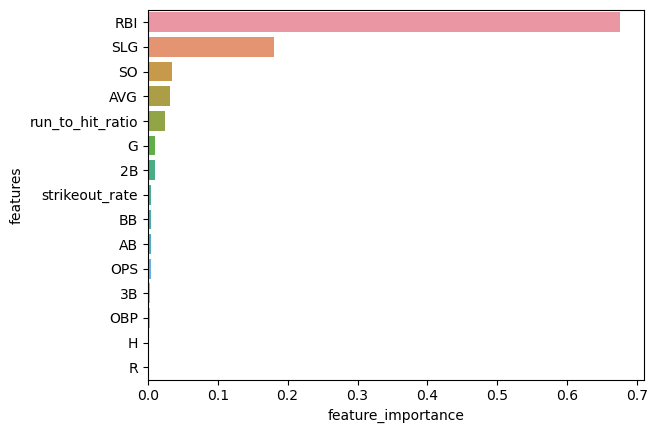

In [83]:
import seaborn as sns

def plot_features(columns, importances, n=15):
    
    df = (pd.DataFrame({'features': columns,
                        'feature_importance': importances})
          .sort_values('feature_importance', ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x='feature_importance',
                y='features',
                data=df[:n],
                )
    
plot_features(columns=X_train.columns, importances=improved_model.feature_importances_)